# Tutorial MNIST

Neste tutorial, aprenderemos conceitos de Machine learning usando o ScikitLearn e o dataset MNIST que é usado para reconhecer imagens de dígitos escritos à mão.

## Importação das bibliotecas

Primeiro passo é importar as bibliotecas necessárias:

**Matplotlib:** para visualização  
**ScikitLearn:** Ferramentas de aprendizado de máquina

```python
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
```

## Carregar o dataset

O scikit-learn vem com alguns datasets padrões como por exemplo o dataset de dígitos manuscritos.  
Para carrega-lo:

```python
digits = datasets.load_digits()
```

Um dataset é um objeto semelhante a um dicionário que contém todos os dados e alguns metadados sobre os dados. Esses dados são armazenados no membro <code>.data</code>, que é uma matriz <code>n_samples</code>, <code>n_features</code>. 

No caso do dataset dos dígitos, <code>digits.data</code> da acesso as features que sao usadas para classificar a amostra de dígitos:

```python
digits.data
```
Saida:
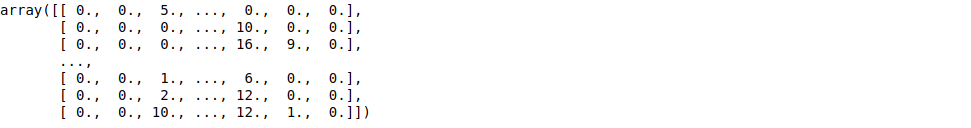

e <code>digits.target</code> da a base(conjunto de treinamento) dos dígitos, que é o numero correspondente a cada imagem de dígito que estamos tentando classificar: 

```python
digits.target
```
Saida:


Os dados são sempre um array 2D, na forma (n_samples, n_features). No caso dos dígitos, cada amostra original é uma imagem de forma (8, 8) e pode ser acessada usando <code>digits.images[0]</code>:

```python
digits.images[0]
```
Saida:
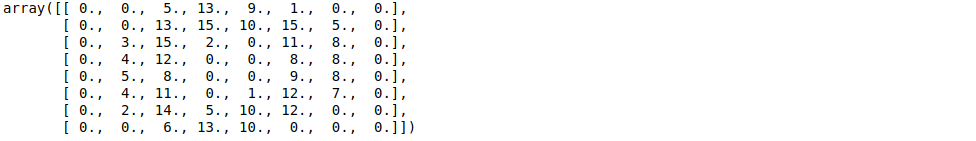

Para visualizar os dígitos em imagem usamos <code>plt.imshow</code>:

```python
plt.subplot(1, 1, 1)
plt.axis('off')
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Training: 0')
plt.show()
```
Saida:
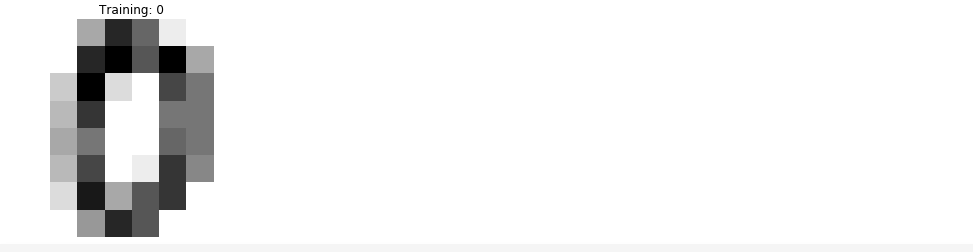

A primeira metade do dataset são os dados de treino, já a segunda são os dados de testes:

```python
num_amostras = len(digits.images)
plt.subplot(1, 1, 1)
plt.axis('off')
plt.imshow(digits.images[num_amostras-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Testing: 0')
plt.show()
```
Saida:
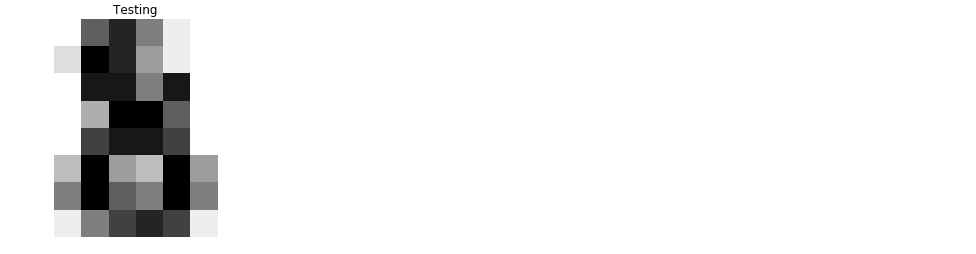

## Aprendendo e prevendo

A tarefa é prever, dada uma imagem, qual dígito ela representa. Recebemos amostras de cada um dos 10 dígitos possíveis (zero a nove) nas quais nos ajustamos a um estimador para poder prever os dígitos às quais as amostras não vistas pertencem.  
No scikit-learn, um estimador para classificação é um objeto Python que implementa os métodos <code>fit(X, y)</code> e <code>predict(T)</code>. 
Um exemplo de um estimador é a classe <code>sklearn.svm.SVC</code>, que implementa a classificação de vetor de suporte.

```python
clf = svm.SVC(gamma=0.001, C=100.)
```

**Obs:**  
Neste exemplo, definimos o valor de gamma manualmente. Para encontrar bons valores para esses parâmetros, podemos usar ferramentas como <a href=https://scikit-learn.org/stable/modules/grid_search.html#grid-search>grid search</a> e <a href=https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation>cross validation</a>.

O estimador <code>clf</code>(de classifier) é ajustado primeiro ao modelo, isto é, deve aprender com a base. Isso é feito passando o conjunto de treinamento para o método <code>fit</code>. Para o conjunto de treinamento, usaremos metade das imagens do nosso dataset, a outra metade reservaremos para a nossa previsão.

```python
metade_amostras = num_amostras//2
clf.fit(digits.data[metade_amostras : num_amostras], digits.target[metade_amostras : num_amostras])
```
Saida:
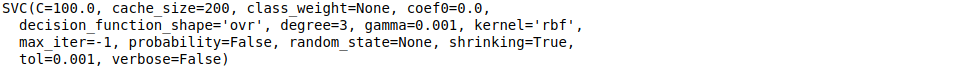

Agora você pode prever novos valores. Nesse caso, você prevê usando a última imagem de <code>digits.data</code>. Ao prever, você determinará a imagem do conjunto de treinamento que melhor corresponde à imagem selecionada.

```python
clf.predict(digits.data[-1:])
```
Saida:


Para visualizar a predição podemos usar:

```python
plt.subplot(1, 1, 1)
plt.axis('off')
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Prediction: %i' % clf.predict(digits.data[-1:]))
plt.show()
```
Saida:
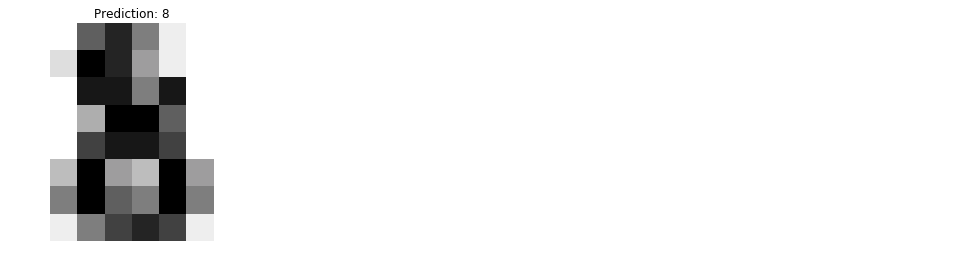